In [112]:
using PyPlot
using Statistics
using Optim

In [132]:
t = 1:0.2:10

1.0:0.2:10.0

In [193]:
y = map(ti -> 3 * ti + 1 + 1 * randn(), t)

46-element Array{Float64,1}:
  2.784902797301479
  5.98258081625924
  4.676530921244562
  6.2968069156609205
  6.59798211763175
  9.058737721541277
  7.804847347197226
  8.174297672717982
  8.497146272546644
  9.09149749310574
 10.803982394143897
 12.084691345656173
 11.37592680242307
  ⋮
 25.137471572704413
 26.26839207964284
 26.961117933883422
 26.01321523060851
 26.248310903731404
 27.11352090208551
 27.45844054229926
 28.272370861935855
 27.597097197378957
 29.25627555010351
 33.03338580649507
 32.41802148340797

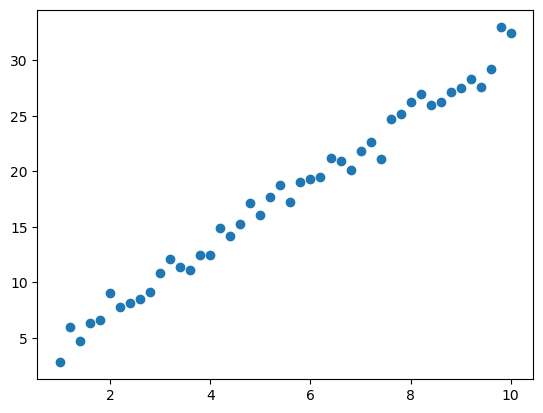

PyObject <matplotlib.collections.PathCollection object at 0x7ff98e2433d0>

In [194]:
scatter(t, y)

In [195]:
v = [ (y[i]-y[i-1])/(t[i]-t[i-1]) for i in 2:length(t)]

45-element Array{Float64,1}:
 15.98839009478881
 -6.530249475073393
  8.101379972081785
  1.5058760098541462
 12.303778019547641
 -6.26945187172025
  1.8472516276037811
  1.614242999143308
  2.9717561027954837
  8.562424505190782
  6.403544757561374
 -3.5438227161655216
 -1.3085847586134924
  ⋮
  2.369335799100918
  5.654602534692129
  3.4636292712029206
 -4.73951351637454
  1.1754783656144816
  4.326049991770512
  1.724598201068754
  4.069651598182983
 -3.3763683227844683
  8.295891763622793
 18.885551281957696
 -3.07682161543551

In [196]:
mean(v)

3.292568742900721

In [197]:
std(v)

6.589873324661466

In [ ]:
3.02 +/- 0.75

In [179]:
?std

search: std stdm stdin stdout stderr setdiff setdiff! hist2D stride strides



```
std(itr; corrected::Bool=true, mean=nothing[, dims])
```

Compute the sample standard deviation of collection `itr`.

The algorithm returns an estimator of the generative distribution's standard deviation under the assumption that each entry of `itr` is an IID drawn from that generative distribution. For arrays, this computation is equivalent to calculating `sqrt(sum((itr .- mean(itr)).^2) / (length(itr) - 1))`. If `corrected` is `true`, then the sum is scaled with `n-1`, whereas the sum is scaled with `n` if `corrected` is `false` with `n` the number of elements in `itr`.

A pre-computed `mean` may be provided.

If `itr` is an `AbstractArray`, `dims` can be provided to compute the standard deviation over dimensions, and `means` may contain means for each dimension of `itr`.

!!! note
    If array contains `NaN` or [`missing`](@ref) values, the result is also `NaN` or `missing` (`missing` takes precedence if array contains both). Use the [`skipmissing`](@ref) function to omit `missing` entries and compute the standard deviation of non-missing values.


---

```
std(x::AbstractArray, w::AbstractWeights, [dim]; mean=nothing, corrected=false)
```

Compute the standard deviation of a real-valued array `x`, optionally over a dimension `dim`. Observations in `x` are weighted using weight vector `w`. The uncorrected (when `corrected=false`) sample standard deviation is defined as:

$$
\sqrt{\frac{1}{\sum{w}} \sum_{i=1}^n {w_i\left({x_i - μ}\right)^2 }}
$$

where $n$ is the length of the input and $μ$ is the mean. The unbiased estimate (when `corrected=true`) of the population standard deviation is computed by replacing $\frac{1}{\sum{w}}$ with a factor dependent on the type of weights used:

  * `AnalyticWeights`: $\frac{1}{\sum w - \sum {w^2} / \sum w}$
  * `FrequencyWeights`: $\frac{1}{\sum{w} - 1}$
  * `ProbabilityWeights`: $\frac{n}{(n - 1) \sum w}$ where $n$ equals `count(!iszero, w)`
  * `Weights`: `ArgumentError` (bias correction not supported)


In [170]:
function sum_residuals_squared(observed_data, model_parameter)
    x = observed_data[1] # vector
    y = observed_data[2] # vector
    
    m = model_parameter[1] # slope, number
    n = model_parameter[2] # offset, number
    
    ym = map(x -> m * x +n, x) # vector
    
    sqrt(sum((y .- ym) .^ 2))
end

sum_residuals_squared (generic function with 1 method)

In [174]:
observed_data = [t, y]

2-element Array{AbstractArray{Float64,1},1}:
 1.0:0.2:10.0
 [3.7901248951298667, 3.6616080841689342, 5.724566431570503, 5.008934351130017, 6.132903313802146, 7.1216386024985585, 5.9224001813739475, 7.176038011382015, 9.871017841081237, 9.954007033720487  …  23.387080045304963, 25.499068959556407, 26.74550582132148, 28.050987954892182, 26.802105459336726, 28.258703522038104, 30.449901895390262, 31.609368199131453, 32.245685449706656, 31.681125446643634]

In [175]:
res = optimize(p -> sum_residuals_squared(observed_data, p),  [1,0.0])

 * Status: success

 * Candidate solution
    Minimizer: [3.12e+00, 2.52e-01]
    Minimum:   5.967764e+00

 * Found with
    Algorithm:     Nelder-Mead
    Initial Point: [1.00e+00, 0.00e+00]

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    46
    f(x) calls:    89


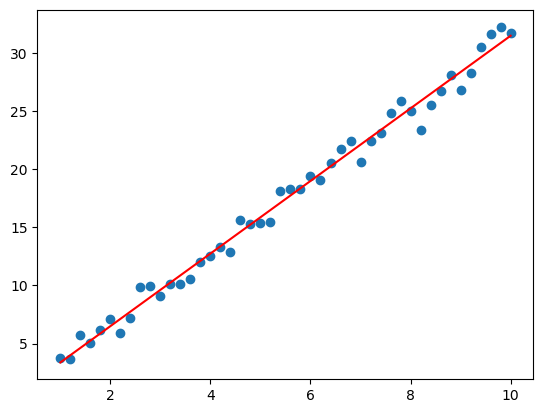

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff98c0b70d0>

In [176]:
m,n = Optim.minimizer(res)

scatter(t, y)
plot(t, map(t-> m*t+n, t), color = "red")

In [99]:
using Random

In [198]:
function slope1()
    t = 1:1.0:10
    y = map(ti -> 3 * ti +1 + 4*randn(), t)
    
    v = [(y[i]-y[i-1])/(t[i]-t[i-1]) for i in 2:length(y)]
    mean(v)
end

slope1 (generic function with 1 method)

In [231]:
slope1()

4.353598002788559

In [247]:
Random.seed!(1234)
vs = [slope1() for i in 1:10000]

@show mean(vs), std(vs);

(mean(vs), std(vs)) = (2.998024670022978, 0.6295062186440472)


In [248]:
function slope2()
    t = 1:1.0:10
    y = map(ti -> 3 * ti +1 + 4*randn(), t)
    
    observed_data = [t, y]
    res = optimize(p -> sum_residuals_squared(observed_data, p),  [100.0,1.0])
    m,s = Optim.minimizer(res)
    m
end

slope2 (generic function with 1 method)

In [249]:
Random.seed!(1234)
vs = [slope2() for i in 1:10000]

@show mean(vs), std(vs);

(mean(vs), std(vs)) = (3.0048218885588485, 0.44210310819240783)
